In [1]:
import os
import sys
sys.path.append('../../')
from melodies_monet import driver
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

plt.set_loglevel (level = 'warning')

Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5netcdf to open files from the Amazon S3 servers.


In [2]:
an = driver.analysis()
an.control = '../yaml/control_tropomi_l2_no2.yaml'
an.read_control()
an.control_dict

{'analysis': {'start_time': '2019-07-15',
  'end_time': '2019-07-16',
  'debug': True,
  'output_dir': '/Users/mengli/Work/melodies-monet/outdata',
  'output_dir_save': '/Users/mengli/Work/melodies-monet/outdata/save_intermediate',
  'output_dir_read': '/Users/mengli/Work/melodies-monet/outdata/read_intermediate',
  'save': {'paired': {'method': 'netcdf', 'prefix': '201907', 'data': 'all'}},
  'read': {'paired': {'method': 'netcdf',
    'filenames': {'tropomi_l2_no2_wrfchem_v4.2': ['201907_tropomi_l2_no2_wrfchem_v4.2.nc4']}}}},
 'obs': {'tropomi_l2_no2': {'debug': True,
   'filename': '/Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/*',
   'obs_type': 'sat_swath_clm',
   'sat_type': 'tropomi_l2_no2',
   'variables': {'qa_value': {'quality_flag_min': 0.7,
     'var_applied': ['nitrogendioxide_tropospheric_column'],
     'fillvalue': 9.96921e+36},
    'nitrogendioxide_tropospheric_column': {'scale': 6.022141e+19,
     'fillvalue': 9.96921e+36,
     'ylabel_plot': 'NO2 trop

In [3]:
# --- satobs
an.open_obs()

Reading TROPOMI L2 NO2
reading /Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/S5P_RPRO_L2__NO2____20190714T231100_20190715T005230_09074_03_020400_20221105T205731.nc
- qa_value
- nitrogendioxide_tropospheric_column
INFO:root:nitrogendioxide_tropospheric_column already masked
- averaging_kernel


/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/driver.py:300: FutureWarning: read_trpdataset is an alias for open_dataset and may be removed in the future
  self.obj = mio.sat._tropomi_l2_no2_mm.read_trpdataset(


INFO:root:averaging_kernel already masked
- air_mass_factor_total
INFO:root:air_mass_factor_total already masked
- air_mass_factor_troposphere
INFO:root:air_mass_factor_troposphere already masked
- latitude
- longitude
- preslev
INFO:root:tm5_tropopause_layer_index already masked
INFO:root:surface_pressure already masked
DEBUG:root:applying quality flag to nitrogendioxide_tropospheric_column
reading /Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/S5P_RPRO_L2__NO2____20190715T005230_20190715T023400_09075_03_020400_20221105T210613.nc
- qa_value
- nitrogendioxide_tropospheric_column
INFO:root:nitrogendioxide_tropospheric_column already masked
- averaging_kernel
INFO:root:averaging_kernel already masked
- air_mass_factor_total
INFO:root:air_mass_factor_total already masked
- air_mass_factor_troposphere
INFO:root:air_mass_factor_troposphere already masked
- latitude
- longitude
- preslev
INFO:root:tm5_tropopause_layer_index already masked
INFO:root:surface_pressure already ma

In [4]:
# --- model
an.open_models()
lat = an.models['wrfchem_v4.2'].obj.coords['latitude']
lon = an.models['wrfchem_v4.2'].obj.coords['longitude']

wrfchem
/Users/mengli/Work/melodies-monet/modeldata/wrfchem/0715/*
**** Reading WRF-Chem model output...


In [5]:
an.models['wrfchem_v4.2']

model(
    model='wrfchem',
    radius_of_influence=1000000.0,
    mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['no2', 'pres', 'height', 'tk', 'height_agl', 'PSFC', 'zstag']},
    file_str='/Users/mengli/Work/melodies-monet/modeldata/wrfchem/0715/*',
    label='wrfchem_v4.2',
    obj=...,
    mapping={'tropomi_l2_no2': {'no2': 'nitrogendioxide_tropospheric_column'}},
    label='wrfchem_v4.2',
    ...
)

In [6]:
an.models['wrfchem_v4.2'].obj

<xarray.Dataset>
Dimensions:        (y: 284, x: 440, time: 24, z: 50, bottom_top_stag: 51)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-07-15T12:00:00 ... 2019-07-15T2...
Dimensions without coordinates: y, x, z, bottom_top_stag
Data variables:
    no2            (time, z, y, x) float32 0.03217 0.0324 ... 0.2095 0.2095
    pres_pa_mid    (time, z, y, x) float32 1.012e+05 1.012e+05 ... 5.584e+03
    alt_msl_m_mid  (time, z, y, x) float32 11.31 11.31 ... 2.032e+04 2.032e+04
    temperature_k  (time, z, y, x) float32 295.2 295.2 295.2 ... 221.9 221.9
    alt_agl_m_mid  (time, z, y, x) float32 11.32 11.32 ... 2.031e+04 2.032e+04
    surfpres_pa    (time, y, x) float32 1.013e+05 1.013e+05 ... 1.006e+05
    zstag          (time, bottom_top_stag, y, x) float32 -0.009976 ... 2.1e+04
    dz_m           (time, z, y, x) float32 22.65 22.64 ... 1.364e+03 1.364e+03
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               NO2 mixing ratio
    units:                     ppmv
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [7]:
an.obs['tropomi_l2_no2'].obj

OrderedDict([('2019-07-14',
              [<xarray.Dataset>
               Dimensions:                              (y: 3245, x: 450, z: 34)
               Coordinates:
                   lon                                  (y, x) float32 -172.1 -171.7 ... 6.39
                   lat                                  (y, x) float32 -78.98 -78.99 ... 53.15
                   time                                 datetime64[ns] 2019-07-14
                   scan_time                            (y) datetime64[ns] 2019-07-14T23:32:...
               Dimensions without coordinates: y, x, z
               Data variables:
                   qa_value                             (y, x) float32 0.0 0.0 0.0 ... 0.0 0.0
                   nitrogendioxide_tropospheric_column  (y, x) float32 nan nan nan ... nan nan
                   averaging_kernel                     (y, x, z) float32 nan nan ... nan nan
                   air_mass_factor_total                (y, x) float32 nan nan nan ... nan nan

In [8]:
# --- paring
an.pair_data()

1, in pair data


/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:166: RuntimeWarning: Mean of empty slice
  no2col_satm = np.nanmean(modobj_tm['no2col'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:204: RuntimeWarning: Mean of empty slice
  modvalue_pb2   =  np.nanmean(modobj_tm['pres_pa_mid'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:205: RuntimeWarning: Mean of empty slice
  modvalue_no2   =  np.nanmean(modobj_tm['no2col'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:231: RuntimeWarning: Mean of empty slice
  no2_nt[nd,:,:] = np.nanmean(np.where(no2_modgrid_all > 0.0, no2_modgrid_all, np.nan), axis=2)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.47800988 max: 4.323498


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.16577756 max: 8.095462


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.2888653 max: 7.061387


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:302: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.38666221 max: 5.1998305


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:329: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('y', 'x') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:231: RuntimeWarning: Mean of empty slice
  no2_nt[nd,:,:] = np.nanmean(np.where(no2_modgrid_all > 0.0, no2_modgrid_all, np.nan), axis=2)


In [9]:
paired_obs = an.paired['tropomi_l2_no2_wrfchem_v4.2'].obj
paired_obs

<xarray.Dataset>
Dimensions:                              (time: 1, y: 124960)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-07-15
    lon                                  (y) float32 -122.3 -122.2 ... -60.37
    lat                                  (y) float32 21.19 21.22 ... 50.24 50.2
    x                                    (y) int64 0 0 0 0 0 ... 283 283 283 283
    ll                                   (y) int64 0 1 2 3 4 ... 436 437 438 439
Dimensions without coordinates: y
Data variables:
    nitrogendioxide_tropospheric_column  (time, y) float32 7.235e+14 ... 2.73...
    latitude                             (y) float32 21.19 21.22 ... 50.24 50.2
    longitude                            (y) float32 -122.3 -122.2 ... -60.37
    no2trpcol                            (time, y) float32 5.606e+14 ... 6.98...
Attributes:
    description:  daily tropomi data at model grids,passing at localtime 13:30

In [10]:
# plotting of paired data
# 1. paired TROPOMI NO2 trop. columns
paired_obs_stack = paired_obs.set_index(y=("x", "ll")).unstack("y")
no2grid = paired_obs_stack['nitrogendioxide_tropospheric_column']
no2grid = no2grid[0,:,:] # time, lat, lon
print('Paired TROPOMI NO2: ',no2grid, np.nanmin(no2grid), np.nanmax(no2grid))

Paired TROPOMI NO2:  <xarray.DataArray 'nitrogendioxide_tropospheric_column' (x: 284, ll: 440)>
array([[7.2350751e+14, 4.9604758e+14, 6.1336985e+14, ..., 5.7691584e+14,
        6.0004485e+14, 6.3978900e+14],
       [6.7961845e+14, 6.3697620e+14, 6.9292680e+14, ..., 6.0560455e+14,
        5.0066021e+14, 3.5759582e+14],
       [6.7708676e+14, 7.4916974e+14, 6.8801886e+14, ..., 6.5409339e+14,
        3.5647202e+14, 4.3862501e+14],
       ...,
       [6.8594648e+14, 5.0632987e+14, 2.9184981e+14, ..., 3.9032381e+14,
        4.2708256e+14, 3.7429123e+14],
       [6.0560609e+14, 4.7556817e+14, 5.0024820e+14, ..., 3.9216313e+14,
        2.1985891e+14, 5.0862053e+14],
       [4.5288112e+14, 9.3726226e+14, 5.8744227e+14, ..., 2.6180060e+14,
        2.3501170e+14, 2.7386159e+14]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-07-15
    lon      (x, ll) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    lat      (x, ll) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50

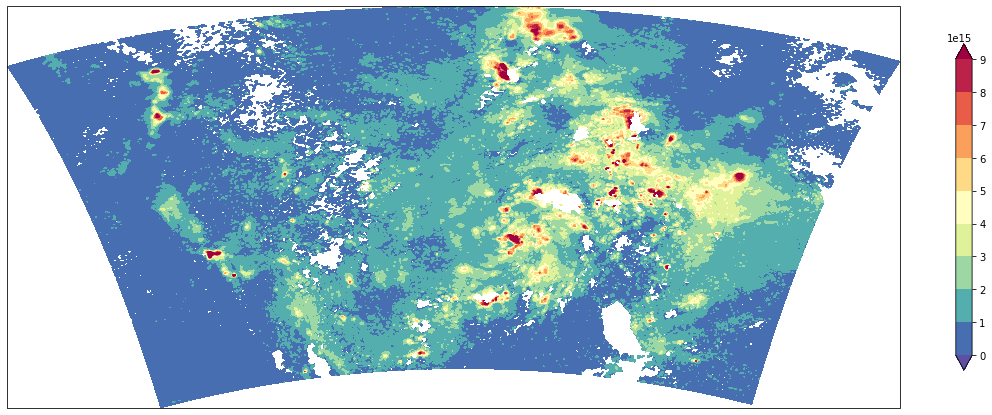

In [11]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
clev = np.arange(0, 1e16, 1*1e15)
plt.contourf(lon, lat, no2grid, clev, cmap='Spectral_r', extend='both')
cbar=plt.colorbar(shrink=0.6)
plt.show()
fig.savefig('/Users/mengli/Work/melodies-monet/outdata/paried_trp_no2_20190715.png')

In [12]:
# 2. paired WRF-Chem NO2 trop. columns
no2grid = paired_obs_stack['no2trpcol']
no2grid = no2grid[0,:,:] # time, lat, lon
print('Paired WRF-Chem NO2: ',no2grid, np.nanmin(no2grid), np.nanmax(no2grid))

Paired WRF-Chem NO2:  <xarray.DataArray 'no2trpcol' (x: 284, ll: 440)>
array([[5.6063946e+14, 5.6148628e+14, 5.6185598e+14, ..., 5.0786596e+14,
        5.1299150e+14, 5.1343012e+14],
       [4.3677925e+14, 4.3662336e+14, 4.3968456e+14, ..., 4.4600756e+14,
        4.5113108e+14, 5.9011710e+14],
       [4.4400607e+14, 4.4382407e+14, 4.4639642e+14, ..., 4.3636465e+14,
        4.4135456e+14, 5.8443506e+14],
       ...,
       [6.1816444e+14, 5.8253554e+14, 6.3732496e+14, ..., 7.8202738e+14,
        7.7514617e+14, 7.7002522e+14],
       [6.0579326e+14, 5.6447869e+14, 5.7416452e+14, ..., 6.6643739e+14,
        6.9233309e+14, 7.3231373e+14],
       [6.1549170e+14, 5.6722579e+14, 5.6877071e+14, ..., 6.5810026e+14,
        6.7532677e+14, 6.9833242e+14]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-07-15
    lon      (x, ll) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    lat      (x, ll) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50.2
  * x        (x) int64

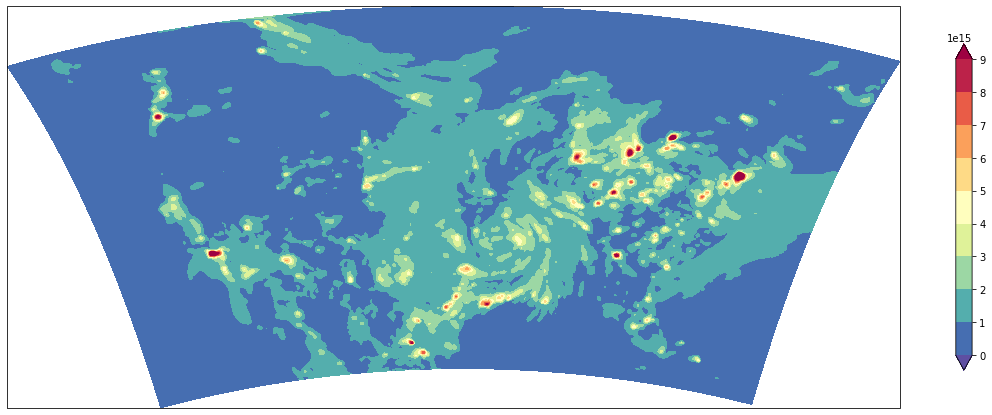

In [13]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
clev = np.arange(0, 1e16, 1*1e15)
plt.contourf(lon, lat, no2grid, clev, cmap='Spectral_r', extend='both')
cbar=plt.colorbar(shrink=0.6)
plt.show()
fig.savefig('/Users/mengli/Work/melodies-monet/outdata/paried_wrfchem_no2_20190715.png')

In [14]:
# --- save paired data ---
an.save_analysis()

Writing: /Users/mengli/Work/melodies-monet/outdata/save_intermediate/201907_tropomi_l2_no2_wrfchem_v4.2.nc4


In [15]:
# --- read saved paired data ---
an.read_analysis()
paired_obs = an.paired['tropomi_l2_no2_wrfchem_v4.2'].obj
paired_obs

Reading: /Users/mengli/Work/melodies-monet/outdata/read_intermediate/201907_tropomi_l2_no2_wrfchem_v4.2.nc4


<xarray.Dataset>
Dimensions:                              (time: 1, y: 124960)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-07-15
    lon                                  (y) float32 ...
    lat                                  (y) float32 ...
    x                                    (y) int64 ...
    ll                                   (y) int64 ...
Dimensions without coordinates: y
Data variables:
    nitrogendioxide_tropospheric_column  (time, y) float32 ...
    latitude                             (y) float32 ...
    longitude                            (y) float32 ...
    no2trpcol                            (time, y) float32 ...
Attributes:
    description:   daily tropomi data at model grids,passing at localtime 13:30
    title:         
    format:        NetCDF-4
    date_created:  2024-10-03
    dict_json:     {\n    "type": "sat_swath_clm",\n    "radius_of_influence"...
    group_name:    tropomi_l2_no2_wrfchem_v4.2

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 63587
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'


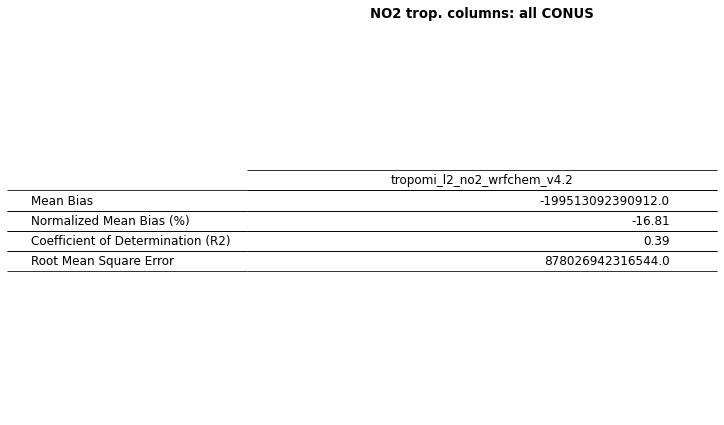

In [16]:
# output statistics
an.stats() 

{'color': 'k', 'linestyle': '-', 'marker': '*', 'linewidth': 2.0, 'markersize': 10.0, 'label': 'tropomi_l2_no2', 'fontsize': 14.4}
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 51779
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'
-3295766073604833.5 3295766073604833.5
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 65536
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'
Reference std: 1091979900000

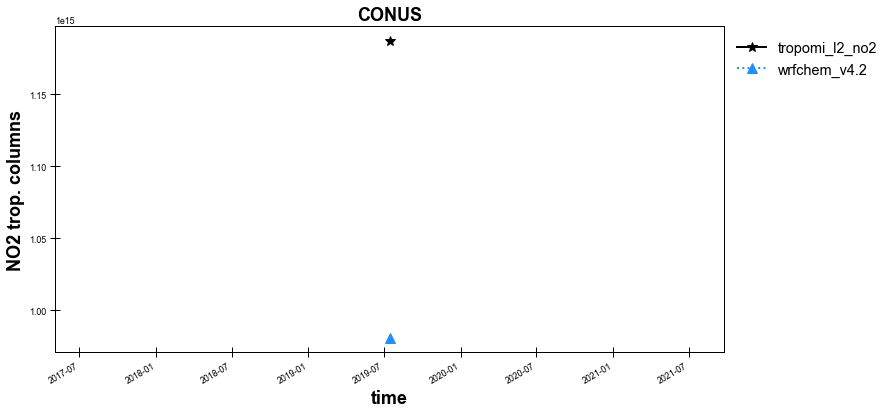

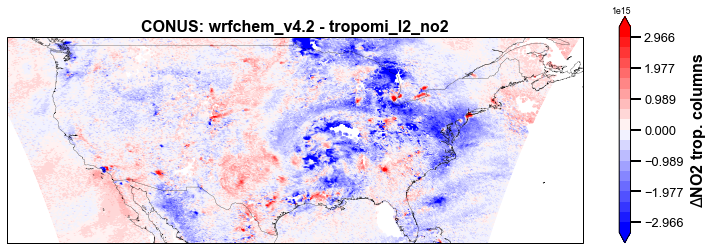

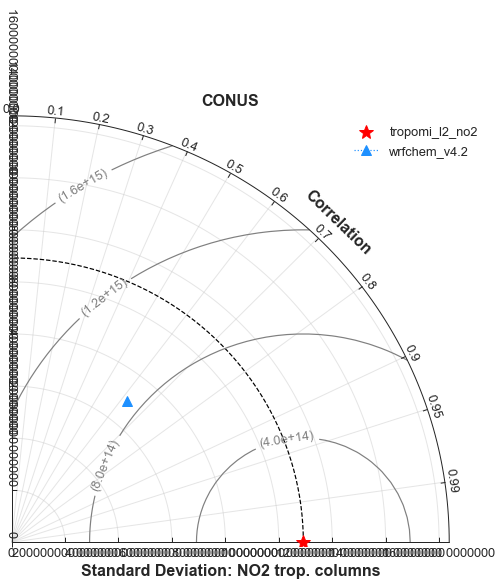

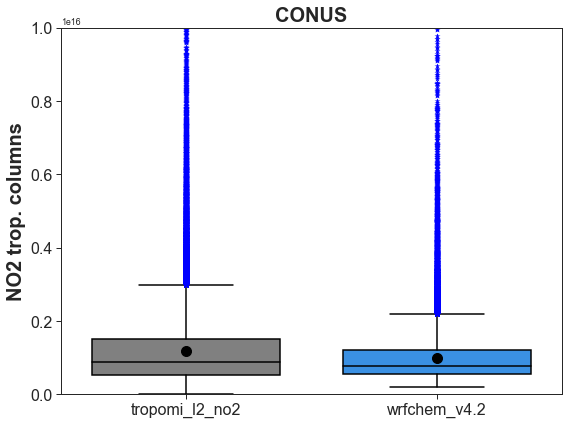

In [17]:
# plotting based on the paired data
from melodies_monet import driver
an.plotting()